In [111]:
KEY_PATH = "../ebird_api.key"
EBIRD_KEY = ""

with open(KEY_PATH) as f:
    EBIRD_KEY = f.read()
_ = """
If you get an error (i.e. FileNotFoundError), that means you don't have the API
key set up. You MUST request your own API key. It is intentionally excluded
from the git repo (via gitignore).
"""

In [112]:
import requests

In [113]:
# San Jose, 37.33 N, 121.86 W
url = "https://api.ebird.org/v2/data/obs/geo/recent/amecro?lat=37.33&lng=-121.86"

payload= {}
headers = {
    'X-eBirdApiToken': EBIRD_KEY
}

response = requests.request("GET", url, headers=headers, data=payload)

In [114]:
import pandas as pd
import plotly.express as px

In [115]:
df = pd.read_json(response.text)
df.head()

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId
0,amecro,American Crow,Corvus brachyrhynchos,L29329165,Monte Sereno,2025-07-12 08:45,1.0,37.234374,-121.984849,True,False,True,S259235802
1,amecro,American Crow,Corvus brachyrhynchos,L280388,Almaden Lake Park,2025-07-12 08:13,6.0,37.241590,-121.872710,True,False,False,S259236356
2,amecro,American Crow,Corvus brachyrhynchos,L16617941,"20626 Scofield Dr, Cupertino US-CA 37.32085, -...",2025-07-12 07:54,2.0,37.320850,-122.034629,True,False,True,S259211295
3,amecro,American Crow,Corvus brachyrhynchos,L42743038,"Muwekma Ohlone MS San Jose US-CA (37.3522,-121...",2025-07-12 07:17,11.0,37.352227,-121.899632,True,False,True,S259207312
4,amecro,American Crow,Corvus brachyrhynchos,L7988700,residence,2025-07-12 05:55,2.0,37.214113,-121.968058,True,False,True,S259182083


In [116]:
# filter out the icky NaN data
df_clean = df[df['howMany'] > 0]

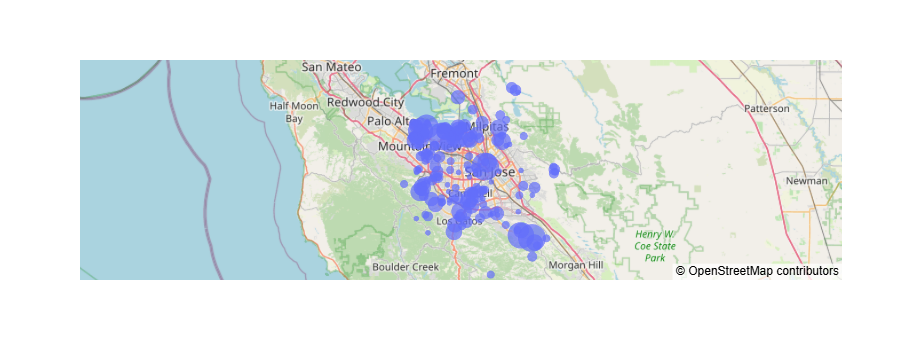

In [117]:
fig = px.scatter_mapbox(df_clean, lat='lat', lon='lng', size='howMany')
fig.update_mapboxes(style='open-street-map')
fig.show()